In [1]:
#run LDA model on DATA ABOUT MARCH 2020

In [373]:
import nltk; 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
#wordcloud generator
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [375]:
filename="news_march_critical.txt"
my_file = open(filename, "r",  encoding="utf8")
content_list = my_file.read()
#print(content_list)
type(content_list)
testo = []
testo.append(content_list)

In [376]:
testo

['3 High-Yield Tech Stocks to Buy to Combat Continued Coronavirus Volatility\n3 Leveraged ETFs For The Fed\'s Move To Near Zero\n3 Top Dividend Stocks to Maximize Your Retirement Income - March 16, 2020\n4 Big Drug/Biotech Stocks Up in Coronavirus-Hit Economy\n4 Europe ETFs That Put Up a Great Fight Last Week\n4 Top Biotech Stocks to Buy in the Time of Coronavirus\n5 Nasdaq Stocks for the Moment You\'re Ready to Buy\n5 Stocks to Buy Instead of Hoarding Cash Amid Coronavirus Sell Off\n5 Stocks to Win Big From Fed\'s Rate Cut to 0%\n5 Tech Companies Boosting Book Value\n5 Top Stocks To Watch In The Coronavirus Stock Market Correction: Zoom Video, ZTO Express\n6 Industrial Products Companies to Consider as Coronavirus Shuts Down Operations\n6 Utilities Gurus Are Buying\n7 Stocks to Gain From Coronavirus-Induced Internet Demand\n8x8 Launches Rapid Expansion Program Enabling Organizations to Quickly Extend Cloud ...\nA Trio of High Quality Stocks for the Value Investor\nâ€“st Source Corp (S

In [377]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [378]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'java', 'org', 'apache'])

In [379]:
## LDA topic model is used for topic/keyword extraction

In [380]:
data= testo ########################### CAMBIA QUI DATI!
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence).encode('utf-8'), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))
print(data_words[:1])

[['high', 'yield', 'tech', 'stocks', 'to', 'buy', 'to', 'combat', 'continued', 'coronavirus', 'volatility', 'leveraged', 'etfs', 'for', 'the', 'fed', 'move', 'to', 'near', 'zero', 'top', 'dividend', 'stocks', 'to', 'maximize', 'your', 'retirement', 'income', 'march', 'big', 'drug', 'biotech', 'stocks', 'up', 'in', 'coronavirus', 'hit', 'economy', 'europe', 'etfs', 'that', 'put', 'up', 'great', 'fight', 'last', 'week', 'top', 'biotech', 'stocks', 'to', 'buy', 'in', 'the', 'time', 'of', 'coronavirus', 'nasdaq', 'stocks', 'for', 'the', 'moment', 'you', 're', 'ready', 'to', 'buy', 'stocks', 'to', 'buy', 'instead', 'of', 'hoarding', 'cash', 'amid', 'coronavirus', 'sell', 'off', 'stocks', 'to', 'win', 'big', 'from', 'fed', 'rate', 'cut', 'to', 'tech', 'companies', 'boosting', 'book', 'value', 'top', 'stocks', 'to', 'watch', 'in', 'the', 'coronavirus', 'stock', 'market', 'correction', 'zoom', 'video', 'zto', 'express', 'industrial', 'products', 'companies', 'to', 'consider', 'as', 'coronaviru

In [381]:
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

In [382]:
data = [re.sub("\'", "", sent) for sent in data]

In [383]:
data = [re.sub("sp", "", sent) for sent in data]
data = [re.sub("spx", "", sent) for sent in data]
data = [re.sub("$sp", "", sent) for sent in data]
data = [re.sub("$spx", "", sent) for sent in data]
data = [re.sub("$spy", "", sent) for sent in data]
data = [re.sub("sp500", "", sent) for sent in data]

In [384]:
data = [re.sub("#x500", "", sent) for sent in data]

In [385]:
#data = [re.sub("#([a-zA-Z0-9_]{1,50})", "", sent) for sent in data]

In [386]:
#data = [re.sub("\$([a-zA-Z0-9_]{1,50})", "", sent) for sent in data]

In [387]:
data = [re.sub("market", "", sent) for sent in data]
data = [re.sub("markets", "", sent) for sent in data]
data = [re.sub("us", "", sent) for sent in data]

In [388]:
data = [re.sub("\n", "", sent) for sent in data]

In [389]:
data_words = list(sent_to_words(data))
print(data[:1])

['3 High-Yield Tech Stocks to Buy to Combat Continued Coronavir Volatility3 Leveraged ETFs For The Feds Move To Near Zero3 Top Dividend Stocks to Maximize Your Retirement Income - March 16, 20204 Big Drug/Biotech Stocks Up in Coronavir-Hit Economy4 Europe ETFs That Put Up a Great Fight Last Week4 Top Biotech Stocks to Buy in the Time of Coronavir5 Nasdaq Stocks for the Moment Youre Ready to Buy5 Stocks to Buy Instead of Hoarding Cash Amid Coronavir Sell Off5 Stocks to Win Big From Feds Rate Cut to 0%5 Tech Companies Boosting Book Value5 Top Stocks To Watch In The Coronavir Stock Market Correction: Zoom Video, ZTO Express6 Indtrial Products Companies to Consider as Coronavir Shuts Down Operations6 Utilities Gur Are Buying7 Stocks to Gain From Coronavir-Induced Internet Demand8x8 Launches Rapid Expansion Program Enabling Organizations to Quickly Extend Cloud ...A Trio of High Quality Stocks for the Value Investorâ€“st Source Corp (SRCE) Chairman, CEO Christopher J Murphy Iii Bought $8â€¦

In [390]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=60) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=60)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['high', 'yield', 'tech', 'stocks', 'to', 'buy', 'to', 'combat', 'continued', 'coronavir', 'volatility', 'leveraged', 'etfs', 'for', 'the', 'feds', 'move', 'to', 'near_zero', 'top', 'dividend', 'stocks', 'to', 'maximize', 'your_retirement_income', 'march', 'big', 'drug', 'biotech', 'stocks', 'up', 'in', 'coronavir', 'hit', 'economy', 'europe', 'etfs', 'that', 'put', 'up', 'great', 'fight', 'last', 'week', 'top', 'biotech', 'stocks', 'to', 'buy', 'in', 'the', 'time', 'of', 'coronavir', 'nasdaq', 'stocks', 'for', 'the', 'moment', 'youre', 'ready', 'to', 'buy', 'stocks', 'to', 'buy', 'instead', 'of', 'hoarding', 'cash', 'amid', 'coronavir', 'sell_off', 'stocks', 'to', 'win', 'big', 'from', 'feds', 'rate_cut', 'to', 'tech', 'companies', 'boosting', 'book', 'value', 'top', 'stocks', 'to', 'watch', 'in', 'the', 'coronavir', 'stock', 'market', 'correction', 'zoom', 'video', 'zto', 'express', 'indtrial', 'products', 'companies', 'to', 'consider', 'as', 'coronavir', 'shuts', 'down', 'operations

In [391]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [392]:
nlp = spacy.load("en_core_web_sm")

In [393]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [394]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# # Do lemmatization keeping only noun, adj, vb, adv
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# print(data_lemmatized[:1])

In [395]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 5), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 4), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 3), (15, 5), (16, 1), (17, 1), (18, 1), (19, 5), (20, 2), (21, 2), (22, 1), (23, 1), (24, 1), (25, 4), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 3), (36, 1), (37, 2), (38, 3), (39, 1), (40, 2), (41, 10), (42, 1), (43, 1), (44, 1), (45, 27), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 3), (55, 3), (56, 2), (57, 1), (58, 1), (59, 6), (60, 4), (61, 9), (62, 4), (63, 1), (64, 1), (65, 35), (66, 3), (67, 2), (68, 1), (69, 17), (70, 3), (71, 9), (72, 1), (73, 1), (74, 8), (75, 1), (76, 3), (77, 4), (78, 1), (79, 8), (80, 1), (81, 2), (82, 5), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 6), (89, 1), (90, 5), (91, 1), (92, 1), (93, 16), (94, 13), (95, 1), (96, 3), (97, 1), (98, 15), (99, 1), (100, 1), (101, 2), (102, 2), (103, 1), (104, 3), (105, 3), (106, 1), (107, 1), (108, 5), (109, 1), (

In [396]:
# Human readable format of corpus (term-frequency)
frequencies=[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
frequencies
df = pd.DataFrame(frequencies)
df
df1_transposed = df.T
df1_transposed[0]

0               (aa, 2)
1              (aan, 5)
2         (aanzhang, 1)
3             (aaon, 2)
4              (aap, 1)
             ...       
8869        (zoradi, 1)
8870           (zto, 2)
8871    (zuckerberg, 1)
8872        (zumiez, 2)
8873          (zumz, 1)
Name: 0, Length: 8874, dtype: object

In [397]:
df1_transposed[['keyword', 'num']] = pd.DataFrame(df1_transposed[0].tolist())
df1_transposed.to_csv('keyssss.csv')

In [398]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [399]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.001*"coronavir" + 0.001*"market" + 0.000*"said" + 0.000*"global" + 0.000*"stock" + 0.000*"inc" + 0.000*"announces" + 0.000*"march" + 0.000*"indtry" + 0.000*"growth"'), (1, '0.022*"coronavir" + 0.014*"market" + 0.008*"said" + 0.007*"global" + 0.007*"stock" + 0.006*"inc" + 0.006*"announces" + 0.004*"stocks" + 0.004*"outbreak" + 0.004*"growth"'), (2, '0.001*"coronavir" + 0.000*"market" + 0.000*"global" + 0.000*"stock" + 0.000*"inc" + 0.000*"said" + 0.000*"announces" + 0.000*"stocks" + 0.000*"ceo" + 0.000*"growth"'), (3, '0.001*"coronavir" + 0.001*"market" + 0.000*"said" + 0.000*"stock" + 0.000*"inc" + 0.000*"global" + 0.000*"announces" + 0.000*"march" + 0.000*"stocks" + 0.000*"growth"'), (4, '0.001*"coronavir" + 0.000*"market" + 0.000*"said" + 0.000*"announces" + 0.000*"stock" + 0.000*"global" + 0.000*"inc" + 0.000*"growth" + 0.000*"outbreak" + 0.000*"indtry"')]


In [400]:
# get all clean topics
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric

lda_topics = lda_model.show_topics(num_words=5)

topics = []
filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]

for topic in lda_topics:
    #print(topic)
    topics.append(preprocess_string(topic[1], filters))

print(topics)

[['coronavir', 'market', 'said', 'global', 'stock'], ['coronavir', 'market', 'said', 'global', 'stock'], ['coronavir', 'market', 'global', 'stock', 'inc'], ['coronavir', 'market', 'said', 'stock', 'inc'], ['coronavir', 'market', 'said', 'announces', 'stock']]


In [401]:
# convert topics into a single string
result = ','.join([item for sub_list in topics for item in sub_list])
result

'coronavir,market,said,global,stock,coronavir,market,said,global,stock,coronavir,market,global,stock,inc,coronavir,market,said,stock,inc,coronavir,market,said,announces,stock'

In [402]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\Giulia\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1     -0.129896  0.0       1        1  99.996051
0      0.028532 -0.0       2        1   0.001018
3      0.031250  0.0       3        1   0.000998
2      0.034555 -0.0       4        1   0.000971
4      0.035559  0.0       5        1   0.000962, topic_info=           Term        Freq       Total Category  logprob  loglift
1706  coronavir  826.000000  826.000000  Default  30.0000  30.0000
4703     market  527.000000  527.000000  Default  29.0000  29.0000
6777       said  282.000000  282.000000  Default  28.0000  28.0000
7518      stock  241.000000  241.000000  Default  27.0000  27.0000
3316     global  244.000000  244.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
210    airlines    0.000059  108.058733   Topic5  -8.6959  -2.8655
1718       corp    0.000058   98.550901   Topic5  -8.7084  -2.7859
2050     demand    0.000058   97.583453   Topic5  -8.7137  -2.7814
8088     trends    0.000058   91.008940   Topic5  -8.7202  -2.7181
307        amid    0.000059  109.102658   Topic5  -8.7071  -2.8863

[332 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
26        1  0.876533     abrupt
136       1  0.876911       aeis
188       1  0.876724       agys
210       1  0.999456   airlines
216       1  0.876702       airt
...     ...       ...        ...
8671      1  0.876648      whyba
8780      1  0.876821  worsening
8786      1  0.993963      would
8790      1  0.876812    wrapped
8822      1  0.994902       year

[188 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3, 5])

In [404]:
#taken from csv saved before and manually cleaned
result ='coronavirus,market,global,announces,stocks,outbreak,growth,march,ceo,covid,monday,financial,airlines,analysis,demand,earnings,billion,pandemic,trends,energy,buy,crisis,investors,production,share,size,government,earnings_report,business,companies,top,size_share,support,president,capital,million,year,oil,health,company,dividend,expected,cut,help'

## WORD CLOUD CREATION

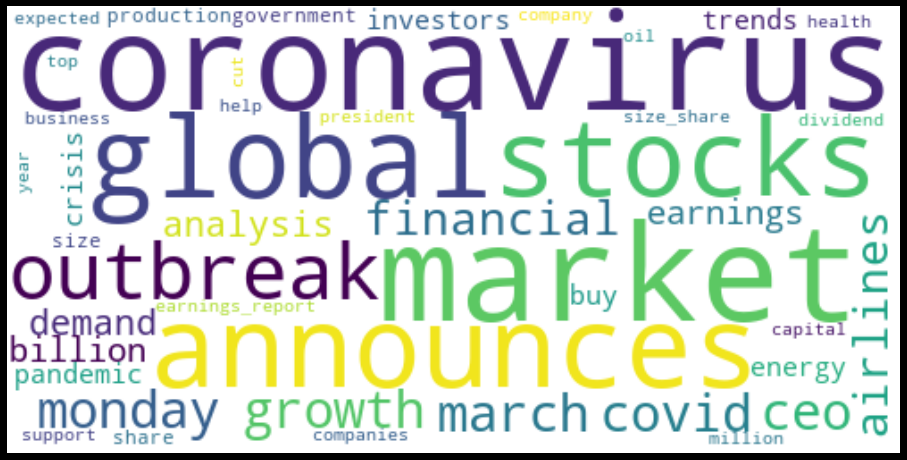

In [407]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=80, max_words=100, background_color="white", width=500,height=250).generate(result)

# Display the generated image:
plt.figure( figsize=(16,9), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("news_march.png")